In [1]:
import numpy as np
import matplotlib.pyplot as plt
from finite_volume.advection import AdvectionSolver

In [2]:
# set up solver
solver_config = dict(
    n=(64,),
    order=8,
    courant=0.79,
    snapshot_dt=0.1,
    num_snapshots=10,
    load=True,
)

# set up problem
problem_config = dict(
    u0="square",
    x=(0, 1),
    y=(0, 1),
    v=(2, 1),
    PAD=(0, 1),
    bc="periodic",
)

# set up slope limiter
limiter_config = dict(
    flux_strategy="gauss-legendre",
    apriori_limiting=True,
    mpp_lite=True,
    adaptive_stepsize=True,
    mpp_tolerance=1e-12,
    SED=True,
)

# execute solver
solver = AdvectionSolver(
    **solver_config,
    **problem_config,
    **limiter_config,
)
solver.rkorder()

# print mpp violations
solver.report_mpp_violations()


                       worst     frequency          mean
         upper  -2.36700e-13   2.34375e-02              
         lower  -5.38540e-13   8.20312e-02              
         total  -5.38540e-13   8.20312e-02   1.28524e-09



Plot solution

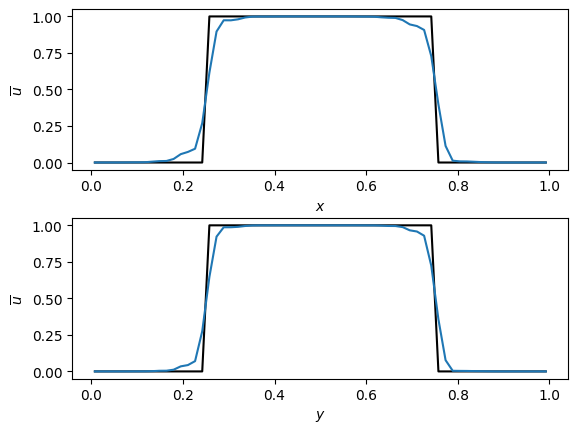

In [3]:
fig, axs = plt.subplots(2, 1)

solver.plot_slice(axs[0], y=0.5, i=0, color="k")
solver.plot_slice(axs[0], y=0.5)
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$\overline{u}$")

solver.plot_slice(axs[1], x=0.5, i=0, color="k")
solver.plot_slice(axs[1], x=0.5)
axs[1].set_xlabel("$y$")
axs[1].set_ylabel("$\overline{u}$")

fig.subplots_adjust(hspace=0.3)

Text(0, 0.5, '$y$')

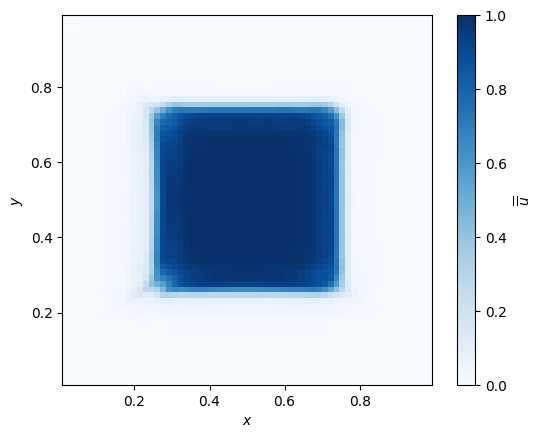

In [4]:
fig, ax = plt.subplots()
im = solver.plot_map(ax, cmap="Blues")
fig.colorbar(im, ax=ax, label="$\overline{\overline{u}}$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Text(0.5, 0, '$\\overline{\\overline{u}}$')

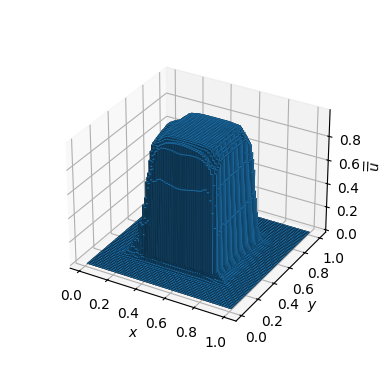

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
solver.plot_cubes(ax)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$\overline{\overline{u}}$")

Plot $1 - \theta$ for _a priori_ slope limiting

Text(0, 0.5, '$y$')

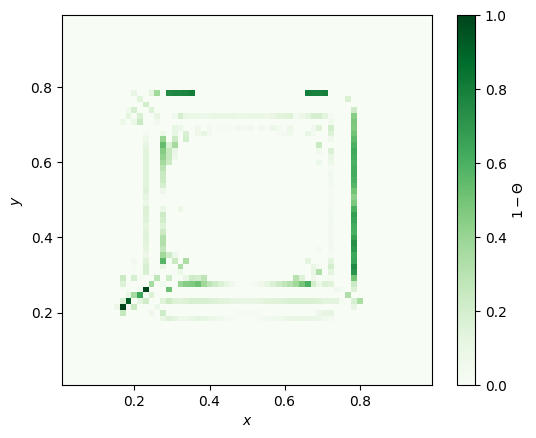

In [6]:
fig, ax = plt.subplots()
im = solver.plot_map(ax, mode="theta", tolerance=1e-2, cmap="Greens")
fig.colorbar(im, ax=ax, label="$1 - \Theta$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Plot troubled cell inditator for _a posteriori_ slope limiting

Text(0, 0.5, '$y$')

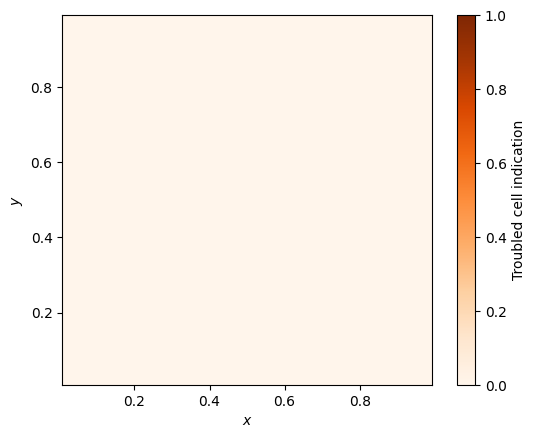

In [7]:
fig, ax = plt.subplots()
im = solver.plot_map(ax, mode="trouble", cmap="Oranges")
fig.colorbar(im, ax=ax, label="Troubled cell indication")
plt.xlabel("$x$")
plt.ylabel("$y$")